# Introduction to NetworkX

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

## A package for graph objects

Graphs (networks) are common objects that occurs  
in many areas, including computer algorithms,  
social networks, logistic arrangement, and so on.  

NetworkX is a Python package that deals with graph objects.  
In this packages, many algorithms have been implemented.

[NetworkX official tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

Let's import the package.  
Recall that you may install the package by  
`pip install networkx --user`

In [1]:
import networkx as nx
### for drawing the graphs
### also import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

There are many built-in graphs.  
See [graph generators](https://networkx.github.io/documentation/stable/reference/generators.html).

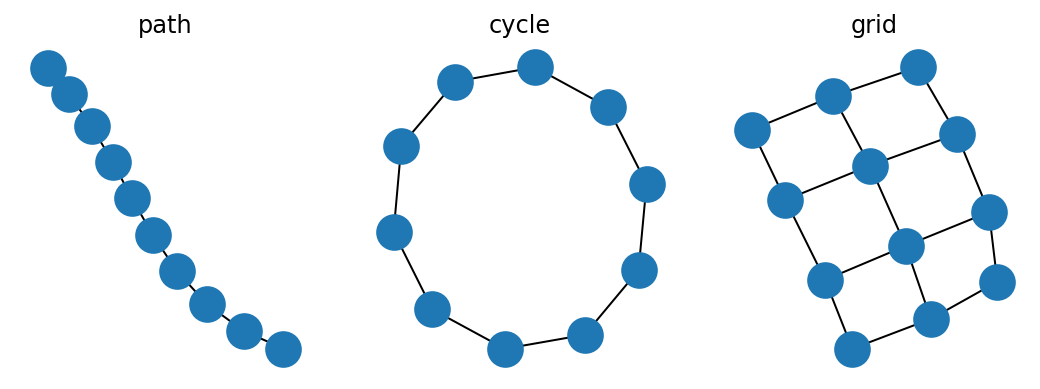

In [10]:
p10 = nx.path_graph(10)
c10 = nx.cycle_graph(10)
grid = nx.grid_2d_graph(3,4)

### use nx.draw to draw the graph
### use matplotlib to control the axes
fig = plt.figure(figsize=(9,3))
axs = fig.subplots(1,3)

graphs = [p10, c10, grid]
titles = ['path', 'cycle', 'grid']
for i in range(3):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.set_axis_off()
    nx.draw(graphs[i], 
           ax=axs[i])

### Nodes, Edges, and Adjacency

In [11]:
g = nx.path_graph(10)

In [13]:
g.nodes ### g.nodes() is also okay

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [14]:
g.edges ### g.edges() is also okay

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [28]:
g.adj ### g.adj() is not okay

AdjacencyView({0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 6: {}}, 6: {5: {}, 7: {}}, 7: {6: {}, 8: {}}, 8: {7: {}, 9: {}}, 9: {8: {}}})

`g.adj` is like a dictionary, while  
`g.adjacency()` is a generator similar to `g.adj.items()`.

In [29]:
for i in g.adjacency():
    print(i)

(0, {1: {}})
(1, {0: {}, 2: {}})
(2, {1: {}, 3: {}})
(3, {2: {}, 4: {}})
(4, {3: {}, 5: {}})
(5, {4: {}, 6: {}})
(6, {5: {}, 7: {}})
(7, {6: {}, 8: {}})
(8, {7: {}, 9: {}})
(9, {8: {}})


### Build a graph by `add_node` and `add_edge`
Create an empty graph and then  
add nodes and edges one by one.

In [40]:
g = nx.Graph() ### g is an empty graph
print(g.nodes)
print(g.edges)

[]
[]


Add a node by `g.add_node(v)`.  
Add many nodes by `g.add_nodes_from([v1, ..., vk])`.

In [41]:
g.add_node(1)
g.add_nodes_from([2,3,4])
g.nodes

NodeView((1, 2, 3, 4))

Add an edge by `g.add_edge(u,v)`.  
Add many edges by `g.add_edges_from([(u1,v1), ..., (uk,vk)])`.

In [42]:
g.add_edge(1,2)
g.add_edges_from([(2,3), (3,4)])
g.edges

EdgeView([(1, 2), (2, 3), (3, 4)])

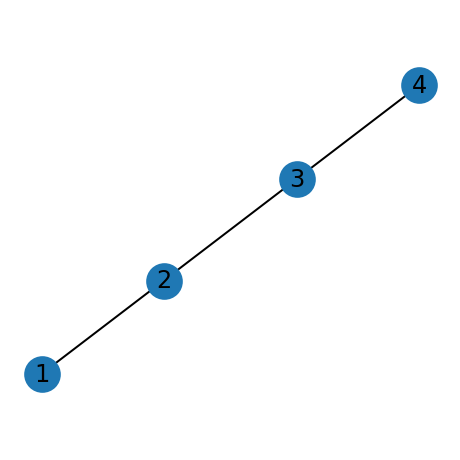

In [37]:
fig = plt.figure(figsize=(3,3))
nx.draw(g, with_labels=True)

When `g` is a graph,  
use `g.remove_node` or `g.remove_nodes_from` to remove nodes, and  
use `g.remove_edge` or `g.remove_edges_from` to remove edges.

In [43]:
g.remove_edge(3,4)
g.remove_node(1)

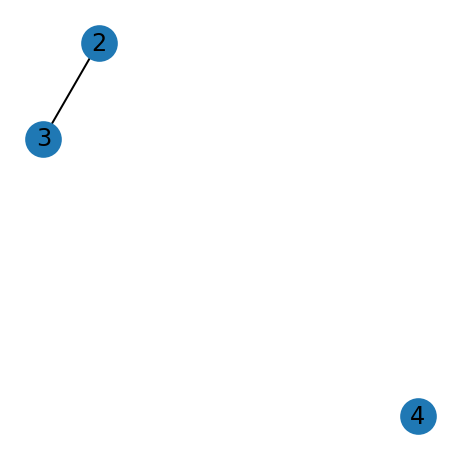

In [44]:
fig = plt.figure(figsize=(3,3))
nx.draw(g, with_labels=True)

### Drawing a graph
`nx.draw` allow us to use matplotlib to draw graphs.  

There are many keywords to adjust the settings,  
and the usage can be found in the docstrings of  
`nx.draw` and `nx.draw_networkx`.

[`nx.draw` docstring](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)  
[`nx.draw_networkx` docstring](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

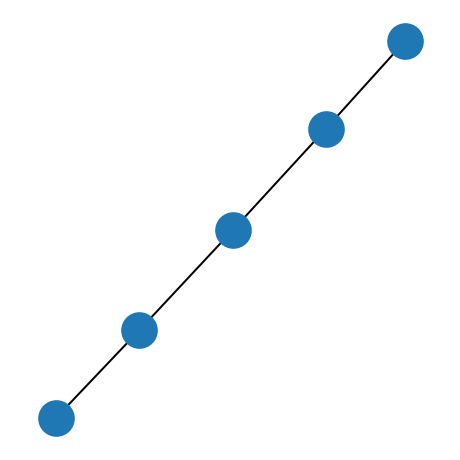

In [46]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
nx.draw(g) ### no node labels by default

Use `with_labels=True` to add the labels.  
Use `labels=dict` to specify labels.

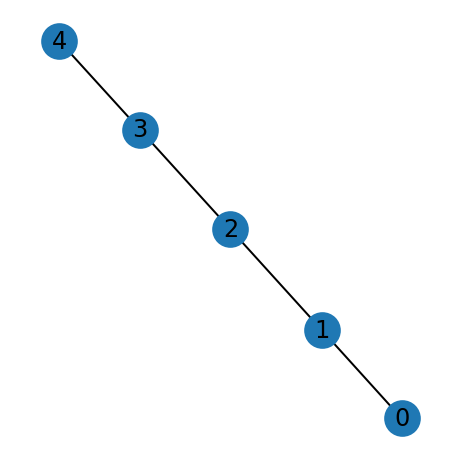

In [47]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
nx.draw(g, with_labels=True) ### label the nodes by node names

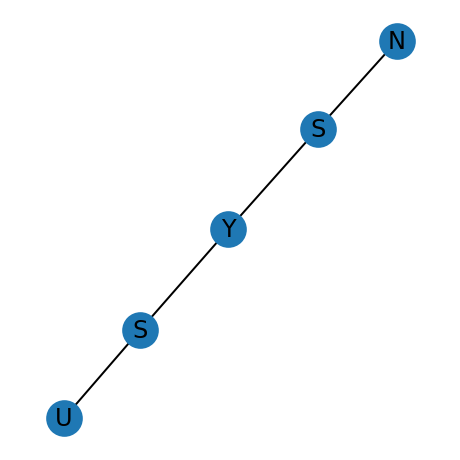

In [48]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
names = {0: 'N', 1: 'S', 2: 'Y', 3: 'S', 4: 'U'}
nx.draw(g, with_labels=True, labels=names) ### label the nodes by specified names

Use `node_size` to specify the size of each nodes.  
It can be a single value (default=300)  
or an array of the same length as `g.nodes`.

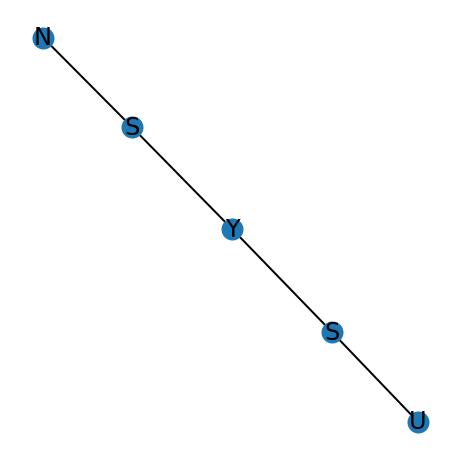

In [55]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
names = {0: 'N', 1: 'S', 2: 'Y', 3: 'S', 4: 'U'}
nx.draw(g, 
        with_labels=True, 
        labels=names, 
        node_size=100)

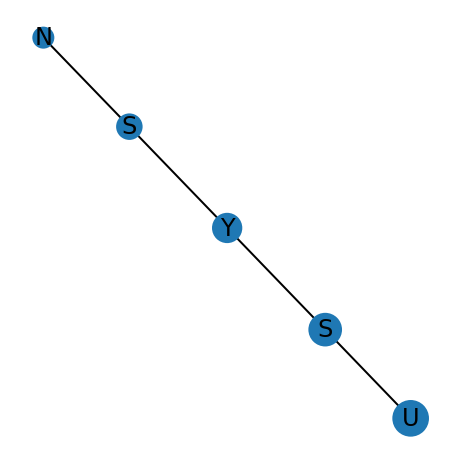

In [59]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
names = {0: 'N', 1: 'S', 2: 'Y', 3: 'S', 4: 'U'}
nx.draw(g, 
        with_labels=True, 
        labels=names, 
        node_size=50*np.arange(5)+100)

Use `node_color` to specify the size of each nodes.  
It can be a single value  
or an array of the same length as `g.nodes`  
(need to specify `cmap` in the latter case).

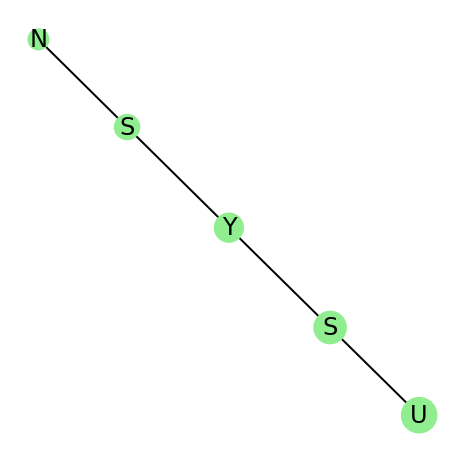

In [61]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
names = {0: 'N', 1: 'S', 2: 'Y', 3: 'S', 4: 'U'}
nx.draw(g, 
        with_labels=True, 
        labels=names, 
        node_size=50*np.arange(5)+100, 
        node_color='lightgreen')

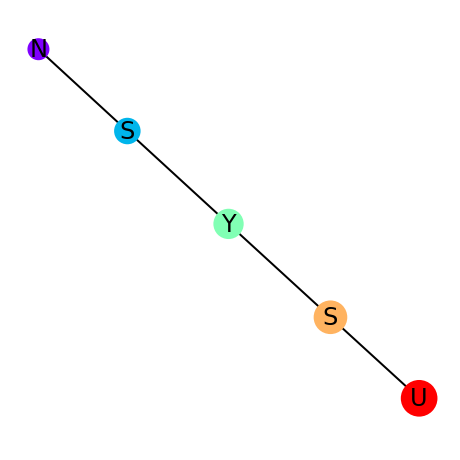

In [64]:
g = nx.path_graph(5)

fig = plt.figure(figsize=(3,3))
names = {0: 'N', 1: 'S', 2: 'Y', 3: 'S', 4: 'U'}
nx.draw(g, 
        with_labels=True, 
        labels=names, 
        node_size=50*np.arange(5)+100, 
        node_color=50*np.arange(5)+100, 
        cmap='rainbow')

### Graph layout and node positions
The difficult part of drawing a graph  
is to determine the node positions.  

Graph drawing is an on-going research area.  

NetworkX provides several common way  
to generate the graph layout.  
That is, to compute the positions of nodes.

[Choices for graph layouts](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html#module-networkx.drawing.layout):  
- `nx.circular_layout`
- `nx.random_layout`
- `nx.shell_layout`
- `nx.spring_layout`
- `nx.spectral_layout`

In [65]:
g = nx.path_graph(5)

pos = nx.circular_layout(g)
pos

{0: array([1.00000000e+00, 2.38418583e-08]),
 1: array([0.30901696, 0.95105658]),
 2: array([-0.80901709,  0.58778522]),
 3: array([-0.80901698, -0.58778535]),
 4: array([ 0.30901711, -0.95105647])}

Use `pos` keyword in `nx.draw`  
to specify the node positions.

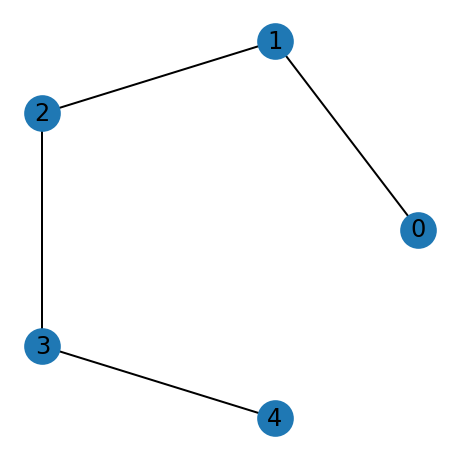

In [66]:
g = nx.path_graph(5)

pos = nx.circular_layout(g)

fig = plt.figure(figsize=(3,3))
nx.draw(g, 
        with_labels=True, 
        pos=pos)

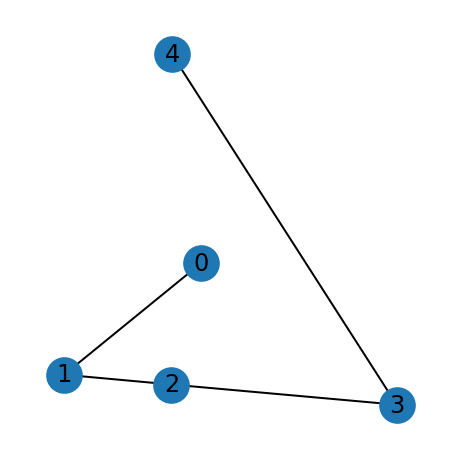

In [8]:
g = nx.path_graph(5)

pos = nx.random_layout(g)

fig = plt.figure(figsize=(3,3))
nx.draw(g, 
        with_labels=True, 
        pos=pos)

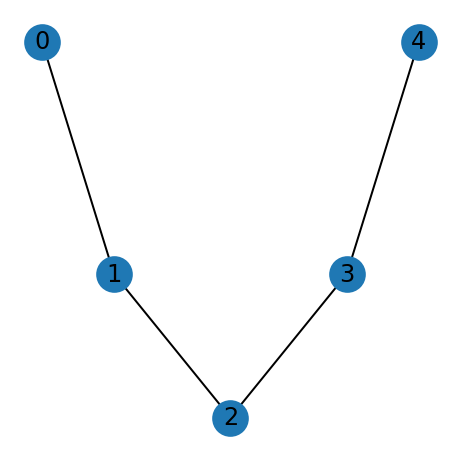

In [12]:
g = nx.path_graph(5)

pos = nx.spectral_layout(g)

fig = plt.figure(figsize=(3,3))
nx.draw(g, 
        with_labels=True, 
        pos=pos)

##### Exercise
Create a graph `g` with  
nodes `0, ..., 9` and  
edges  
`(0,1), (1,2), (2,3), (3,4), (4,5), (5,6)`  
`(6,0), (0,7), (7,8), (8,9), (9,7)`.  

In [30]:
### your answere here


##### Exercise
Obtain `g` by the following.
```Python
g = nx.Graph()
g.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
g.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,0), (0,7), (7,8), (8,9), (9,7)])
```
Draw the graph `g`  
on a figure of size `(3,3)`  
using the spring layout.

In [30]:
### your answere here


##### Exercise
Obtain `g` by the following.
```Python
g = nx.Graph()
g.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
g.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,0), (0,7), (7,8), (8,9), (9,7)])
```
A **balanced partition** of a set $V$  
is a pair of two sets $X$ and $Y$ such that  
$X\cap Y=\emptyset$, $X\cup Y=V$, and $|X|=|Y|$.

Find a balanced partition $(X,Y)$ of the node set of `g`  
with fewest edges between $X$ and $Y$.  

Hint: you might need the following.  
```Python
from itertools import combinations
```

In [30]:
### your answere here


##### Exercise
Obtain `g` by the following.
```Python 
g = nx.random_graphs.erdos_renyi_graph(10,0.1)
```
Explore the function `nx.connected_components` and  
print the node sets of each connected components.

In [30]:
### your answere here


#### Exercise
Obtain `g` by the following.
```Python 
g = nx.random_graphs.erdos_renyi_graph(10,0.1)
```
Draw `g` on a figure of size `(3,3)` and  
use node colors to distinguish the connected components.

In [30]:
### your answere here


##### Exercise
Obtain `g1, ..., g6` by the following.
```Python
g1 = nx.path_graph(1)
g2 = nx.path_graph(2)
g3 = nx.path_graph(3)
g4 = nx.cycle_graph(4)
g5 = nx.complete_bipartite_graph(1,4)
g6 = nx.grid_2d_graph(2,3)
```
Draw the six graphs  
on `subplots(2,3)`.

In [30]:
### your answere here
